In [5]:
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize

import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

import spacy

In [7]:
#get stock symbols and company name
stock_symbol_meta = pd.read_csv('data/stock-market-dataset/symbols_valid_meta.csv')

In [8]:
#Number of Company Symbols
len(list(stock_symbol_meta['Symbol']))

8049

In [9]:
stock_symbol_meta.replace('AGM$A', 'AGM-A', inplace=True)

In [10]:
stock_symbol_meta.query('Symbol == "AGM-A"')

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
162,Y,AGM-A,Federal Agricultural Mortgage Corporation 5.87...,N,,N,100.0,N,NaN,AGMpA,AGM-A,N


In [11]:
stock_symbol_meta.query('ETF == "N"')['Symbol'];

In [12]:
#read through all stock symbols getting their stock historical data
stock_data_df_list = []
#loop through Stocks ignore ETFs for now
for i in list(stock_symbol_meta.query('ETF == "N"')['Symbol']):
    print(i, end='\r')
    path = 'data/stock-market-dataset/stocks/'+i+'.csv'
    if not os.path.exists(path):
        continue
    
    stock_data_df = pd.read_csv(path)
    stock_data_df['Symbol'] = i
    stock_data_df_list.append(stock_data_df)

In [13]:
#check number of df to concat
len(stock_data_df_list)

5882

In [14]:
#concate stock data df list
final_stock_data_df = pd.concat(stock_data_df_list)

In [15]:
final_stock_data_df.reset_index(inplace=True, drop=True)

In [16]:
final_stock_data_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
24182542,2020-03-26,10.23,11.43,10.23,11.10,11.10,189500.0,ZYXI
24182543,2020-03-27,10.70,10.98,10.06,10.30,10.30,145000.0,ZYXI
24182544,2020-03-30,10.16,11.06,10.16,10.80,10.80,162300.0,ZYXI
24182545,2020-03-31,10.68,11.14,10.59,11.07,11.07,280400.0,ZYXI
24182546,2020-04-01,11.16,11.16,10.51,10.92,10.92,315900.0,ZYXI


In [17]:
stock_data1 = pd.read_csv("data/stock-market-dataset/stocks/AAPL.csv")

In [18]:
stock_data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [19]:
#read json files in from folder to process into data frame
json_news_path = 'data/news/2018_01'
json_news_files = [f for f in listdir(json_news_path) if isfile(join(json_news_path, f))]

In [20]:
#start with 1000 files just to see how it runs
news_data = []
columns = ['title', 'published']

for i in range(0, 10000):
    data = json.load(open(json_news_path+'/'+json_news_files[i]))
    print(f"Opening File {i} - {json_news_files[i]}", end='\r')
    data_normalize = json_normalize(data)
    
    news_data.append(list(data_normalize[['title', 'published']].iloc[0]))

/Users/jjackson/opt/anaconda3/envs/BrainStationCapstone/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [21]:
# list(data_normalize[['title', 'text', 'published']].iloc[0])
# df = pd.DataFrame(data_normalize[['title', 'text', 'published']])
# df['published'] = pd.to_datetime(df['published'])
# df
columns = ['title', 'published']
news_df = pd.DataFrame(news_data, columns=columns)
news_df['published'] = pd.to_datetime(news_df['published'])

In [22]:
news_df['title'] = news_df['title'].str.strip()

In [23]:
news_df.head()

,title,published
0,EMERGING MARKETS-Mexican peso seesaws over dol...,2018-01-26 01:01:00+02:00
1,"Migrants must visit Nazi concentration camps, ...",2018-01-10 21:52:00+02:00
2,Euro zone businesses start 2018 on decade high,2018-01-24 19:14:00+02:00
3,Russia's Lavrov says 'unilateral actions' by U...,2018-01-21 20:31:00+02:00
4,Lawmakers to Justice Department: Keep online g...,2018-01-12 16:55:00+02:00


In [24]:
sentiment_train_data = pd.read_csv('data/sentiment-analysis-for-financial-news/all-data copy.csv', names=['Sentiment', 'Text'], encoding = "utf-8")

In [25]:
sentiment_train_data.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [26]:
sentiment_train_data['Sentiment'].value_counts().index

Index(['neutral', 'positive', 'negative'], dtype='object')

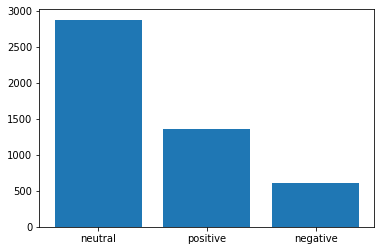

In [27]:
plt.figure()
plt.bar(sentiment_train_data['Sentiment'].value_counts().index, sentiment_train_data['Sentiment'].value_counts())
plt.show()